In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pathlib
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report

## CSV to image conversion

In [8]:
data_dir_2 = (r'D:\Rostock-Masters\Thesis\Data\new_test_data\csv_files')
data_dir_2 = pathlib.Path(data_dir_2)
data_dir_2

WindowsPath('D:/Rostock-Masters/Thesis/Data/new_test_data/csv_files')

In [9]:
file_name_dict_2 = {
    '9' : list(data_dir_2.glob('9/*.csv')),
    '10' : list(data_dir_2.glob('10/*.csv')),
    '11' : list(data_dir_2.glob('11/*.csv')),
    '12' : list(data_dir_2.glob('12/*.csv')),
    '13' : list(data_dir_2.glob('13/*.csv')),
#     'Device_6' : list(data_dir_2.glob('Device_6/*.csv')),
}

In [10]:
len(file_name_dict_2['9'])

10

In [11]:
def csv_plot(device, fold_name, img_name):
    df_shortened_list = []
    for csv_file in file_name_dict_2[device]:
            csv_file_df = pd.read_csv(str(csv_file))
            csv_file_df.columns = ['time', 'voltage']
            df_short = csv_file_df #csv_file_df.iloc[:2000, :]
            df_shortened_list.append(df_short)
            
    #Saving plotted images
    for j in range (len(df_shortened_list)):
        plt.figure(100,figsize=(1,1))
        plt.axis('off')
        plt.plot(df_shortened_list[j]['time'], df_shortened_list[j]['voltage'])
        plt.savefig(r'D:\Rostock-Masters\Thesis\Data\new_test_data\images\{}/{}-{}.jpg'.format(fold_name,img_name,j),bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [12]:
## save image to folder
csv_plot('9', '9', '9')
csv_plot('10', '10', '10')
csv_plot('11', '11', '11')
csv_plot('12', '12', '12')
csv_plot('13', '13', '13')

## Image processing

In [13]:
data_dir = (r'D:\Rostock-Masters\Thesis\Data\new_test_data\images')
data_dir

'D:\\Rostock-Masters\\Thesis\\Data\\new_test_data\\images'

In [14]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Rostock-Masters/Thesis/Data/new_test_data/images')

In [17]:
device_image_dict = {
    '9' : list(data_dir.glob('9/*.jpg')),
    '10' : list(data_dir.glob('10/*.jpg')),
    '11' : list(data_dir.glob('11/*.jpg')),
    '12' : list(data_dir.glob('12/*.jpg')),
    '13' : list(data_dir.glob('13/*.jpg')),
}

In [18]:
device_image_dict['9'][1]

WindowsPath('D:/Rostock-Masters/Thesis/Data/new_test_data/images/9/9-1.jpg')

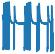

In [19]:
PIL.Image.open(str(device_image_dict['9'][9]))

In [20]:
devices_label_dict = {
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
}

In [21]:
len(device_image_dict['13'])

10

In [22]:
# str(device_image_dict['Device_3'][0])

## Classification

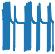

In [23]:
#Reading with cv2
image_2= cv2.imread (str(device_image_dict['10'][9]))
#Converting to RGB
RGB_img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
#plotting RGB images
image_3 = PIL.Image.fromarray(RGB_img)
image_3

### Image shape

In [24]:
#Saving image data to a dataframe
device_list=[]
label_list = []

for device_name, folder in device_image_dict.items():
    for image in folder:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(35,35))
        flattened = resized_img.reshape(-1)
        df_flat= pd.DataFrame(flattened.reshape(1,-1))
        device_list.append(df_flat)
        label_list.append(devices_label_dict[device_name])

In [25]:
len(device_list)

50

In [26]:
len(label_list)

50

In [27]:
device_list[5]

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,250,252,252,242,249,255,250,252,241,255,...,239,253,249,244,255,254,251,252,248,247


In [28]:
df_merged= pd.concat(device_list)
df_merged= df_merged.reset_index(drop=True)
df_merged

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,237,252,253,253,247,245,255,253,223,252,...,253,255,250,252,254,251,255,243,244,251
1,243,255,247,251,254,254,255,250,247,255,...,238,255,255,243,253,252,244,248,251,250
2,244,253,249,251,253,246,255,252,236,255,...,239,255,253,241,255,255,248,253,255,254
3,247,247,253,238,244,254,249,250,244,255,...,238,255,255,241,253,253,246,245,247,245
4,235,252,253,252,250,248,255,252,221,250,...,230,255,253,242,255,251,254,254,248,254
5,250,252,252,242,249,255,250,252,241,255,...,239,253,249,244,255,254,251,252,248,247
6,243,252,254,234,245,252,250,253,248,255,...,224,252,247,233,254,252,244,250,250,248
7,250,252,252,242,249,255,251,252,242,255,...,247,254,250,246,255,251,250,255,251,251
8,241,254,250,250,254,254,255,251,250,255,...,235,255,251,236,251,249,241,249,250,248
9,243,250,255,250,247,247,255,254,233,255,...,250,255,254,240,255,254,235,255,255,241


In [29]:
#Merging, Adding label, shuffling
df_with_label= df_merged
df_with_label['label'] = label_list
df_1 = df_with_label.sample(frac = 1).reset_index(drop=True)
# df_1.to_csv('device_with_label.csv', index=False)
df_1

,0,1,2,3,4,5,6,7,8,9,...,3666,3667,3668,3669,3670,3671,3672,3673,3674,label
0,255,251,251,250,252,253,252,253,243,255,...,253,250,236,255,255,246,255,253,250,13
1,250,247,255,254,246,246,255,252,241,255,...,255,252,237,254,254,246,254,253,249,13
2,247,247,253,238,244,254,249,250,244,255,...,255,255,241,253,253,246,245,247,245,9
3,250,252,252,242,249,255,251,252,242,255,...,254,250,246,255,251,250,255,251,251,9
4,255,254,254,255,254,246,241,245,251,237,...,254,248,251,254,250,254,249,252,255,10
5,240,253,252,245,253,245,255,255,233,255,...,252,249,235,252,250,242,246,246,244,10
6,239,254,255,254,243,243,255,254,223,255,...,254,253,244,254,254,249,252,254,253,12
7,255,255,249,244,252,255,234,248,255,252,...,253,253,250,247,251,251,247,252,254,11
8,247,249,253,242,250,255,251,253,241,255,...,255,248,236,255,253,245,254,251,251,10
9,248,250,255,239,244,255,250,251,248,255,...,254,250,237,253,248,240,255,254,252,13


In [30]:
y = np.array(df_1.label)
df_1.drop('label', axis=1,inplace= True)
df_1.shape

(50, 3675)

In [31]:
resized_img.shape

(35, 35, 3)

In [32]:
df_merged.shape

(50, 3676)

In [33]:
X = np.array(df_1).reshape(df_1.shape[0],resized_img.shape[0],resized_img.shape[1],resized_img.shape[2])
X.shape

(50, 35, 35, 3)

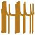

In [34]:
data = PIL.Image.fromarray(X[1])
data

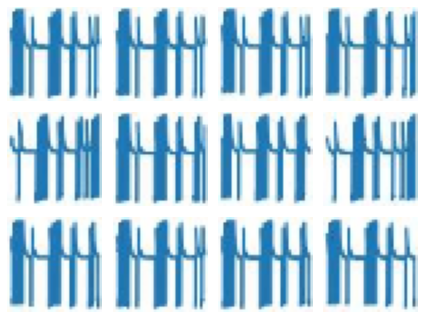

In [35]:
plt.figure(figsize = (6, 6))

for i in range(12):
    plt.subplot(4, 4, i+1)#.set_title(f'Device {y[i]}')
    RGB_img = cv2.cvtColor(np.squeeze(X[i]), cv2.COLOR_BGR2RGB)
    plt.imshow (RGB_img)
    plt.axis('off')

plt.tight_layout()
# plt.savefig('6_M2_image_random_subplot.png', dpi=200)

In [36]:
X.shape

(50, 35, 35, 3)

In [37]:
len(X)

50

In [38]:
X_test = X
X_test.shape

(50, 35, 35, 3)

In [39]:
#scaling data from 0 to 1
X_test_scaled = X_test/255.0

In [40]:
X_test_scaled[40].shape

(35, 35, 3)

In [41]:
y_test = y
y_test

array([13, 13,  9,  9, 10, 10, 12, 11, 10, 13, 10, 11, 11, 13, 11, 12,  9,
       13, 12, 12, 10, 13, 12, 12,  9, 11,  9, 11, 10, 13,  9, 11, 13, 13,
        9, 10, 13, 12,  9, 10, 12,  9, 12,  9, 10, 11, 10, 11, 11, 12],
      dtype=int64)

In [42]:
#Loading saved model
s_model = keras.models.load_model('saved_model.h5')
s_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 17, 17, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [43]:
# model_2.save('saved_model.h5')

In [44]:
# tf.keras.utils.plot_model(model_2, show_shapes=True)

### Prediction

In [45]:
# X_test_scaled[1]

In [46]:
# single prediction
y_pred = s_model.predict(X_test_scaled[0:1])
y_pred

1/1 [==============================] - 7s 7s/step


array([[4.6761146e-05, 1.4595371e-10, 9.9994671e-01, 5.7293443e-07,
        5.9870017e-06, 2.7799250e-13]], dtype=float32)

In [47]:
y_pred = s_model.predict(X_test_scaled)
import sys
np.set_printoptions(threshold=sys.maxsize, suppress=True)
y_pred

2/2 [==============================] - 0s 76ms/step


array([[0.00004681, 0.        , 0.9999466 , 0.00000057, 0.00000599,
        0.        ],
       [0.00003393, 0.        , 0.99996185, 0.00000039, 0.00000387,
        0.        ],
       [0.9999362 , 0.00000229, 0.00006155, 0.        , 0.        ,
        0.        ],
       [0.9999858 , 0.00000037, 0.00001382, 0.        , 0.        ,
        0.        ],
       [0.00000505, 0.00452783, 0.00021735, 0.9952421 , 0.00000026,
        0.00000749],
       [0.00000084, 0.99986506, 0.        , 0.00013041, 0.        ,
        0.00000369],
       [0.00426167, 0.07148474, 0.0000031 , 0.00195473, 0.00000337,
        0.9222924 ],
       [0.00013773, 0.00000005, 0.9963762 , 0.00064627, 0.00283972,
        0.        ],
       [0.00000061, 0.9996562 , 0.        , 0.00033679, 0.        ,
        0.00000641],
       [0.0001556 , 0.        , 0.99981767, 0.00000241, 0.00002444,
        0.        ],
       [0.00000147, 0.9995296 , 0.00000001, 0.00045569, 0.        ,
        0.00001332],
       [0.00000001, 0

In [48]:
normal = []
abnormal = []
max_value_list= []
for i in y_pred:
    max_value= np.max(i)
    max_value_list.append(max_value)
    if max_value <=0.70:
        abnormal.append(max_value)
        print('Anomaly detected')
    else:
        normal.append(max_value)

print('The number of total abnormal observations are: ',len(abnormal))

Anomaly detected
Anomaly detected
Anomaly detected
Anomaly detected
Anomaly detected
Anomaly detected
The number of total abnormal observations are:  6


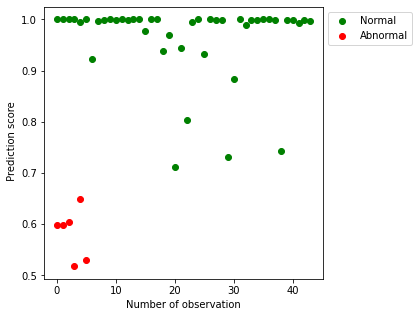

In [51]:
plt.figure(100,figsize=(5,5))
norm_range= range(len(normal))
abnorm_range= range(len(abnormal))

plt.scatter(norm_range, normal, c='g')
plt.scatter(abnorm_range, abnormal, c= 'red')
plt.xlabel('Number of observation')
plt.ylabel(' Prediction score')
plt.legend(['Normal', 'Abnormal'],bbox_to_anchor = (1 , 1))
# plt.savefig('anomaly_detection_real_data.pdf',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

In [55]:
y_pred_class = [np.argmax(i) for i in y_pred]
y_pred_class[:10]

[2, 2, 0, 0, 3, 1, 5, 2, 1, 2]

In [56]:
y_test[10:20]

array([10, 11, 11, 13, 11, 12,  9, 13, 12, 12], dtype=int64)

In [57]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{9: 10, 10: 10, 11: 10, 12: 10, 13: 10}

In [58]:
loss, accuracy= s_model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

2/2 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1800
Loss: nan, Accuracy: 0.18000000715255737
Test accuracy :  18.000000715255737 %
